# California Housing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
pwd

'C:\\Users\\gujjar'

In [3]:
cd\Users\gujjar\downloads\

C:\Users\gujjar\downloads


In [4]:
pwd

'C:\\Users\\gujjar\\downloads'

In [5]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


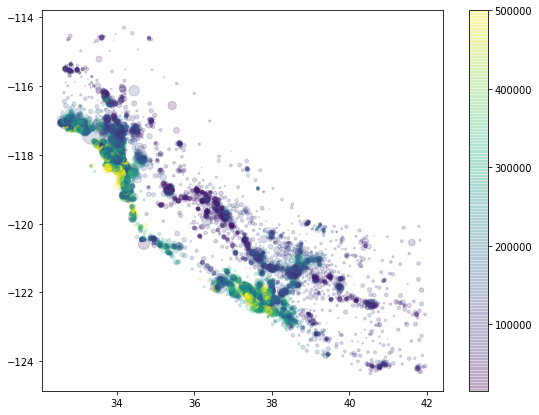

In [6]:
plt.figure(figsize = (9,7))
plt.scatter(housing.latitude,housing.longitude,alpha = 0.2,c=housing.median_house_value,s=housing.population/100)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A272D10>,
      dtype=object)

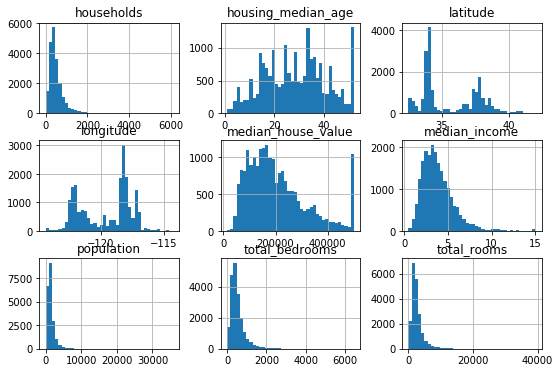

In [7]:
#relationships
housing.hist(bins=40,figsize=(9,6))

### Split the data

In [8]:
y = housing['median_house_value']

x= housing.drop('median_house_value',axis=1)
x['total_bedrooms'].fillna(x.total_bedrooms.median(),inplace=True)

In [9]:
x['rooms_per_house'] =x['total_rooms']/x['households']
x['bedroom_per_room'] = x['total_bedrooms']/x['total_rooms']
x['population_per_household'] = x['population']/x['households']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [12]:
x_train.shape

(16512, 12)

In [13]:
x_test.shape

(4128, 12)

In [14]:
train = x_train.join(y_train)
corr_mat = train.corr()

In [15]:
#corr_mat['median_house_value'].sort_values(ascendng=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0BC20570>,
      dtype=object)

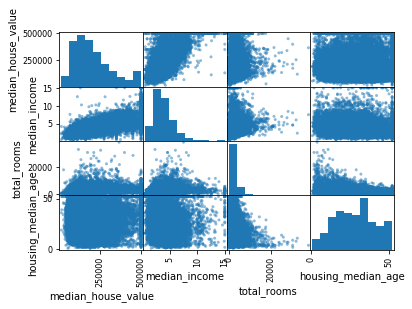

In [16]:
housing_cols = train[['median_house_value','median_income','total_rooms','housing_median_age']]

scatter_matrix(housing_cols)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
lr = LinearRegression()

In [19]:
x = train['median_income'].values.reshape(-1,1)
y = train['median_house_value']

lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
pred = lr.predict(x)
pred

array([102333.01883324, 312399.10938486, 276470.82381988, ...,
       221572.60421663, 161350.59139674,  84981.55138951])

In [21]:
mse = mean_squared_error(pred,y)
np.sqrt(mse)

84036.53612967048

### numerical feature

In [22]:
train = train.drop('ocean_proximity',axis=1)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 19320 to 4588
Data columns (total 12 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16512 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
rooms_per_house             16512 non-null float64
bedroom_per_room            16512 non-null float64
population_per_household    16512 non-null float64
median_house_value          16512 non-null float64
dtypes: float64(12)
memory usage: 2.1 MB


In [24]:
x = train.drop('median_house_value',axis=1)
y = train['median_house_value']

### Scaling

In [25]:
#scaling

from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline

In [26]:
pipeline = Pipeline([('sts_scalar',StandardScaler()),('poly_features',PolynomialFeatures(degree=2))])

In [27]:
housing_prepared = pipeline.fit_transform(x)

### Model

In [28]:
lr = LinearRegression()
lr.fit(housing_prepared,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lr.score(housing_prepared,y)

0.7085031342062154

In [30]:
lr.predict(housing_prepared[:10])

array([116955.78256368, 339888.72013659, 245689.71342954, 121862.39443986,
       169078.16631098, 269700.54641473, 146167.6137456 , 148241.02359617,
       304627.75932107, 386657.45117668])

In [31]:
predict = lr.predict(housing_prepared)

mse = mean_squared_error(predict,y)
rmse = np.sqrt(mse)
rmse

62447.00053243314

## Cross Validation and Grid Search

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [33]:
lasso = Lasso()
alphas = [0.5,1,4,10,50,100]
param_grid = [{'alpha':alphas}]
grid_search = GridSearchCV(lasso,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25545159514481.594, tolerance: 17535576137.09368
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25579787696049.945, tolerance: 17658902016.793903
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25266915026490.625, tolerance: 17891779569.51442
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.5, 1, 4, 10, 50, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [34]:
grid_search.best_estimator_

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
lasso = grid_search.best_estimator_
lasso.fit(housing_prepared,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4953606112155.5625, tolerance: 22089656197.459915
  positive)


Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
predictions = lasso.predict(housing_prepared)
mse = mean_squared_error(predictions,y)
rmse = np.sqrt(mse)
rmse

62828.42052798313

In [37]:
x_test['total_bedrooms'].fillna(x_test.total_bedrooms.median(),inplace=True)

dummies = pd.get_dummies(x_test['ocean_proximity'])
x_test = x_test.join(dummies)
x_test = x_test.drop('ocean_proximity',axis=1)
y = y_test

In [38]:
scaler = StandardScaler()
x = scaler.fit_transform(x_test)

lasso.fit(x,y)
predictions = lasso.predict(x)
mse = mean_squared_error(predictions,y)
rmse = np.sqrt(mse)
rmse

65529.371245172755

In [39]:
lr.fit(x,y)
predictions = lr.predict(x)
mse = mean_squared_error(predictions,y)
rmse = np.sqrt(mse)
rmse

65520.24110776267